<a href="https://colab.research.google.com/github/lazarogibert/Repositorio/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Casos de covid

In [ ]:
casos_covid = pd.read_csv("https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv")


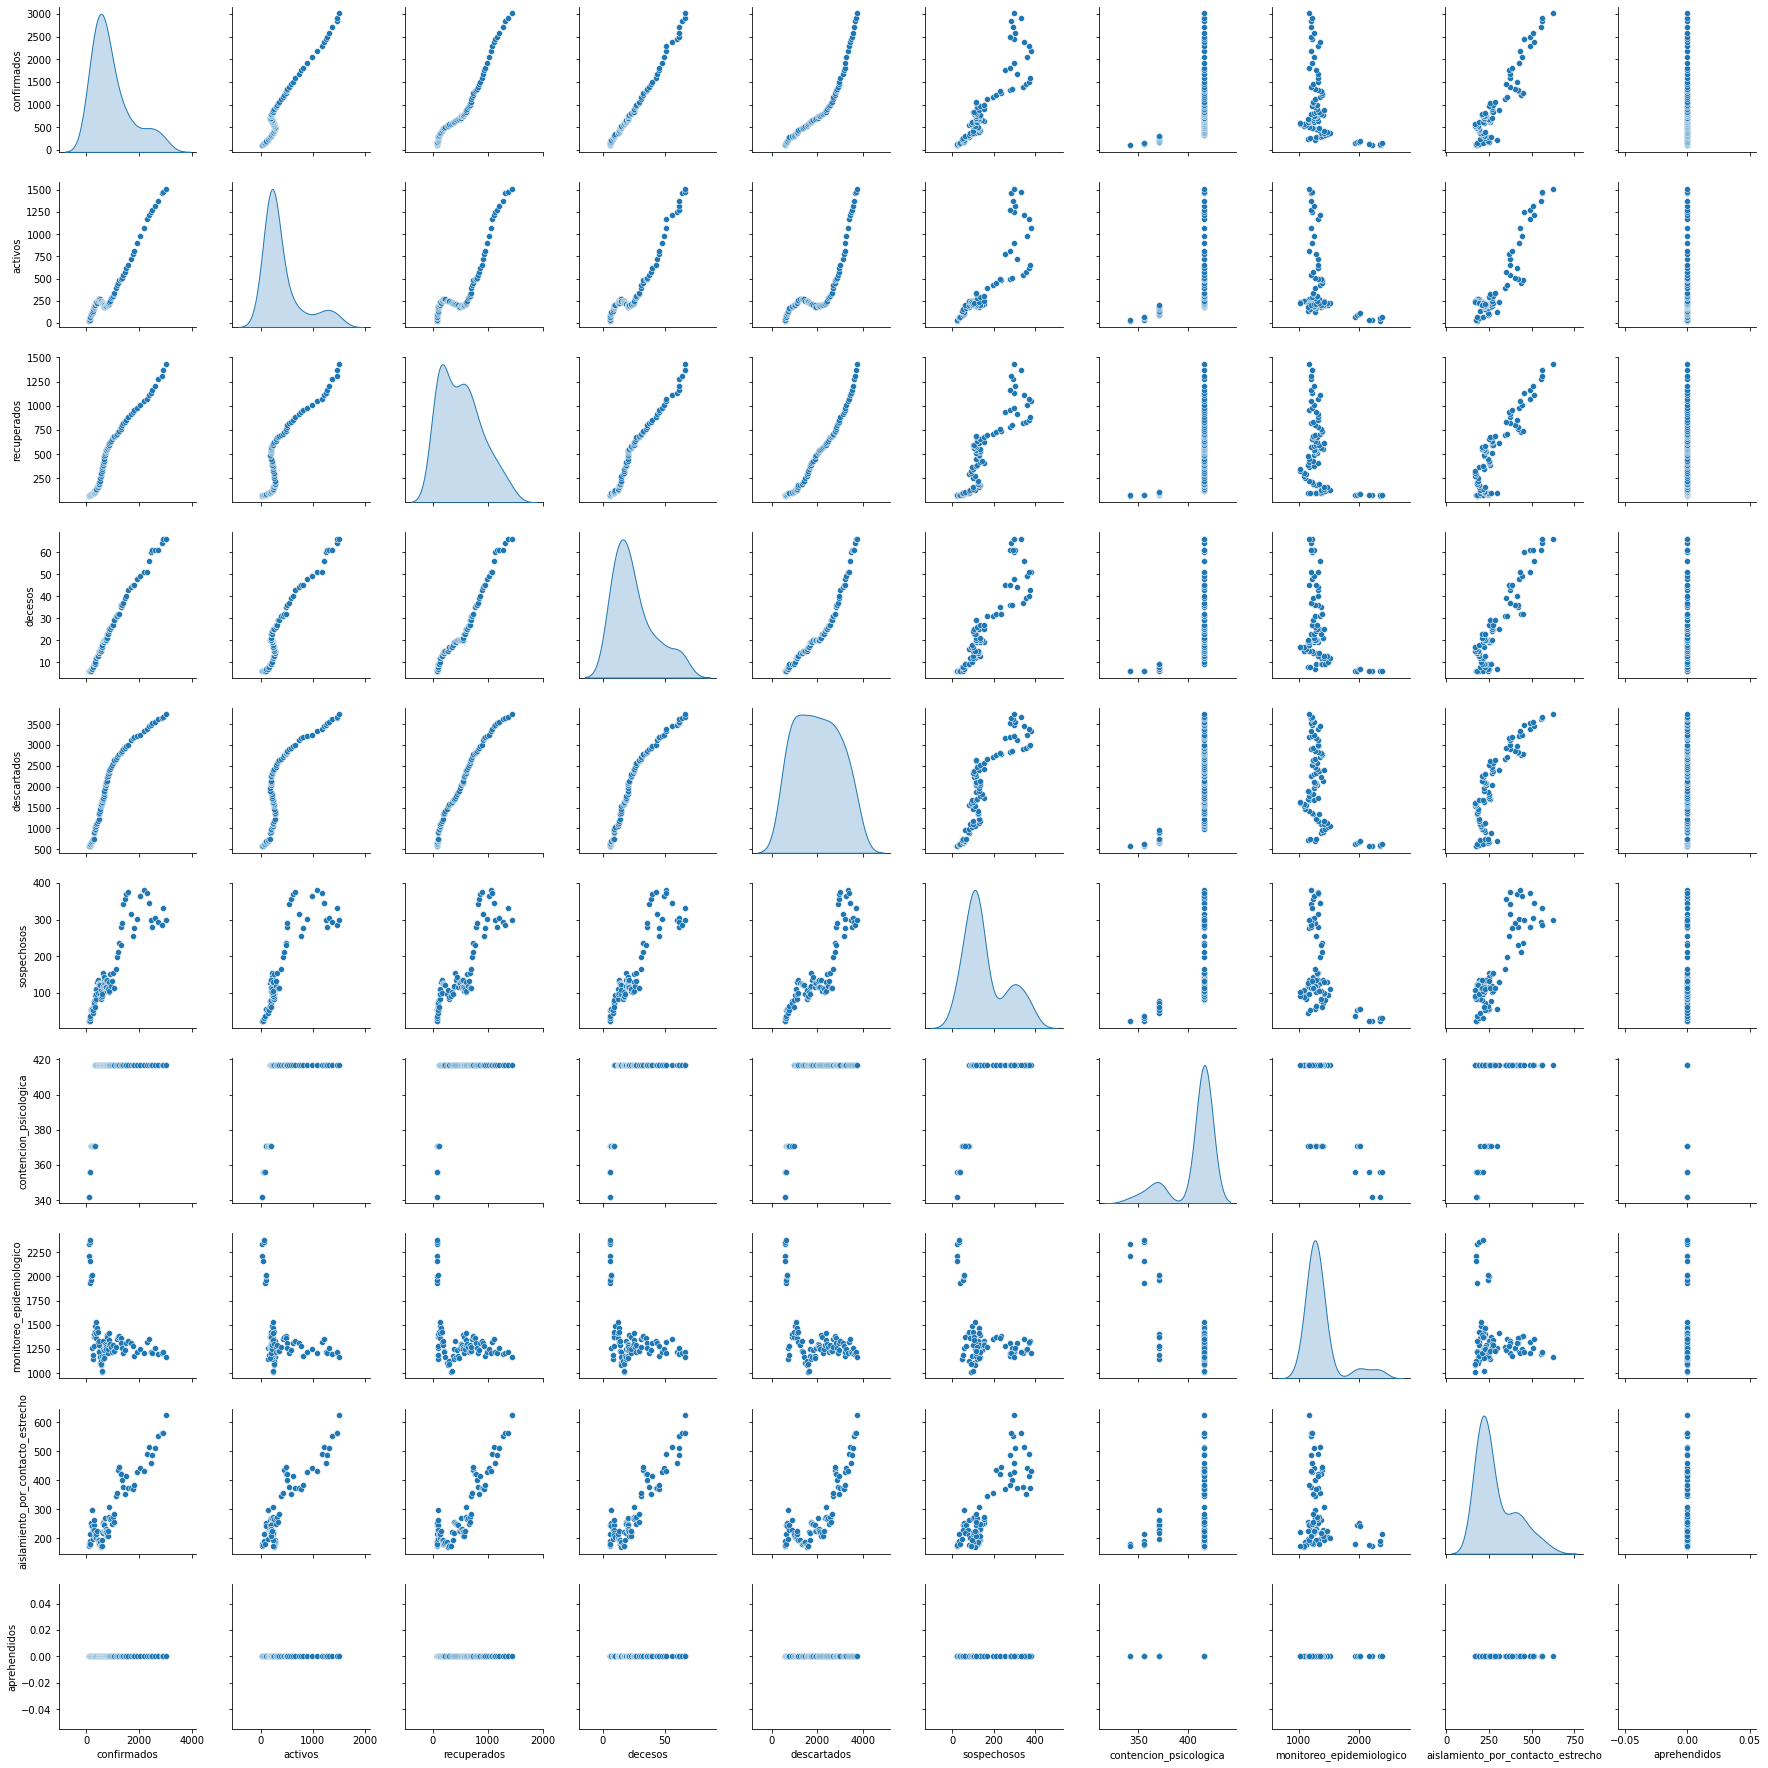

In [ ]:
sns.pairplot(casos_covid, diag_kind="kde")

Despues de graficar los datos del dataset se puede observar que hay varias variables que presentan datos de comportamiento extraño.

In [ ]:
casos_covid.describe()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0


In [ ]:
# calcular media y sdt
feature = 'contencion_psicologica'
data_mean, data_std = casos_covid[feature].mean(), casos_covid[feature].std()
print("feature0 mean:{} std:{}".format(data_mean, data_std))

feature0 mean:407.29545454545456 std:21.174241069008463


In [ ]:
# Distancia desde la media
nstd = 3.0
dist = data_std * nstd

# limites
lower_bound, upper_bound = data_mean - dist, data_mean + dist
print('[',lower_bound,',',upper_bound,']')

[ 343.77273133842914 , 470.81817775248 ]


Acá se puede observar que la variable contencion_psicologica tiene datos atípicos es decir de comportamiento extraño.

In [ ]:
# Máscara atípica, Verdadera = atípico
outliers_mask = [True if x < lower_bound or x > upper_bound else False for x in casos_covid[feature]]
print("Outliers:\n{}".format(casos_covid[feature][outliers_mask]) )

Outliers:
0    342
1    342
Name: contencion_psicologica, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


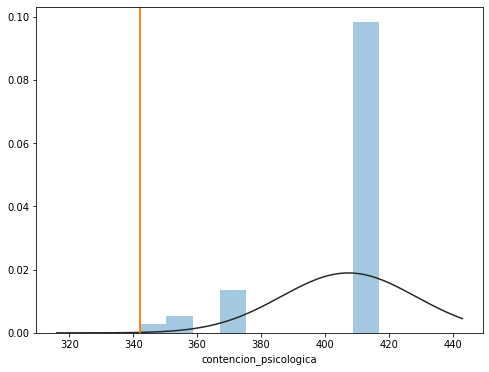

In [ ]:
# Normal fitting for reference curve
from scipy.stats import norm

# Plot the distribution histogram and highlight outliers in red
plt.figure(figsize=(8,6))
sns.distplot(casos_covid[feature], fit=norm ,kde=False);
for outlier in casos_covid[feature][outliers_mask]:
    plt.axvline(outlier, 0, casos_covid[feature].max(), color = '#FF7F0E')

In [ ]:
#Calcular rango intercuartil
q25, q75 = np.percentile(casos_covid[feature], 25), np.percentile(casos_covid[feature], 75)
iqr = q75 - q25
iqr

0.0

In [ ]:
# Calcule el rango de valores atípicos
k = 1.5
range_ir = iqr * k

# Límites
lower_bound_ir, upper_bound_ir = q25 - range_ir, q75 + range_ir

In [ ]:
# Máscara atípica, Verdadera = atípico
outliers_mask_ir = [True if x < lower_bound_ir or x > upper_bound_ir else False for x in casos_covid[feature]]
print("Outliers:\n{}".format(casos_covid[feature][outliers_mask_ir]) )

Outliers:
0     342
1     342
2     356
3     356
4     356
5     356
6     371
7     371
8     371
9     371
10    371
11    371
12    371
13    371
14    371
15    371
Name: contencion_psicologica, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


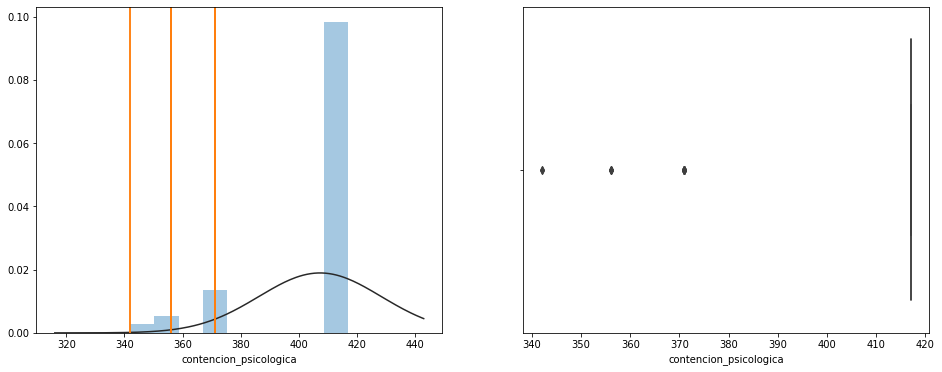

In [ ]:
# Trace el histograma de distribución y resalte los valores atípicos en rojo
plt.figure(figsize=(16,6))
ax1=plt.subplot(1, 2, 1)

sns.distplot(casos_covid[feature], fit=norm ,kde=False, ax = ax1);
for outlier in casos_covid[feature][outliers_mask_ir]:
    plt.axvline(outlier, 0, casos_covid[feature].max(), color = '#FF7F0E')
    
ax2=plt.subplot(1, 2, 2)
sns.boxplot(x=casos_covid[feature], whis=k, ax = ax2)

# Camas de covid

In [ ]:
camas_covid = pd.read_csv("https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv")

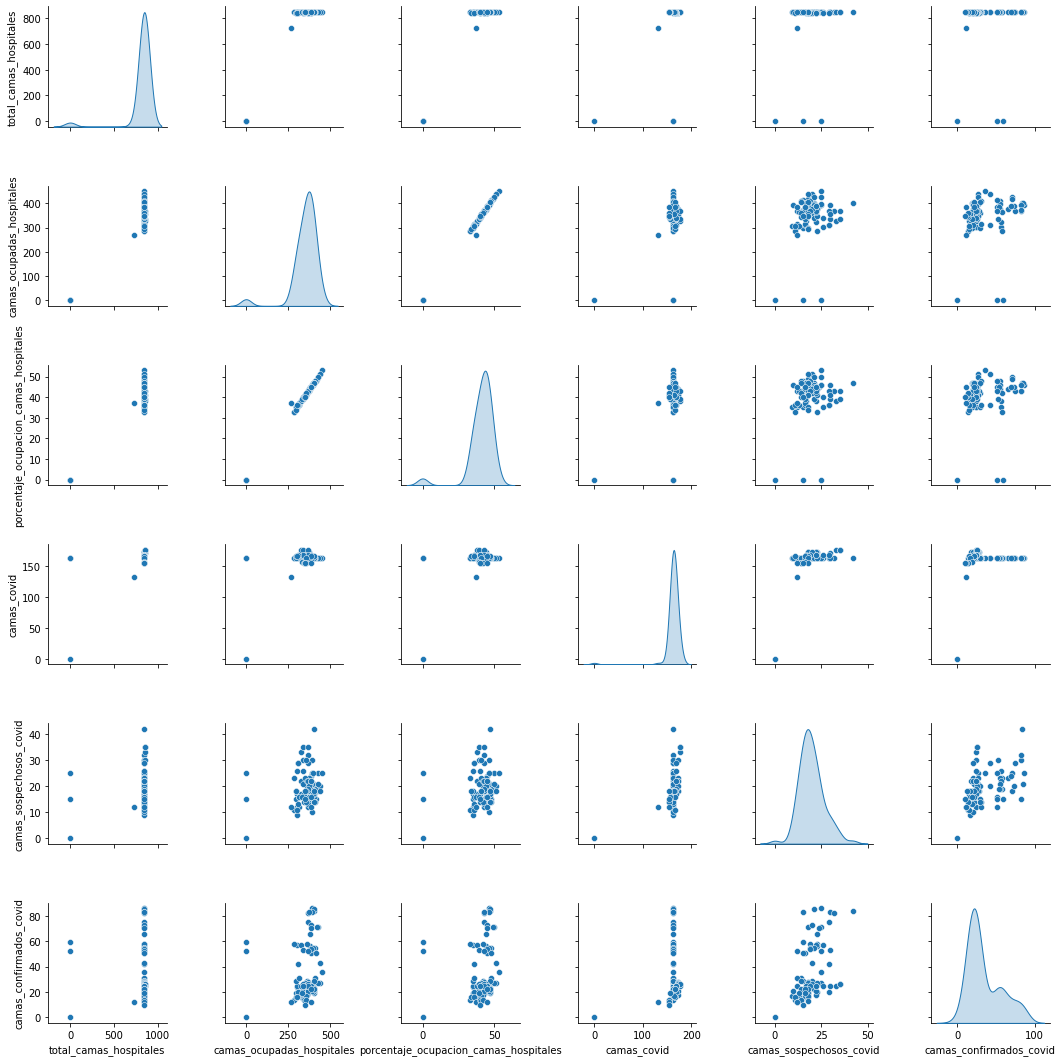

In [ ]:
cols = ['total_camas_hospitales','camas_ocupadas_hospitales', 'porcentaje_ocupacion_camas_hospitales', 'camas_covid', 'camas_sospechosos_covid', 'camas_confirmados_covid']
sns.pairplot(camas_covid[cols], diag_kind="kde")

Despues de graficar los datos del dataset se puede observar que hay varias variables que presentan datos de comportamiento extraño como por ejemplo la variable camas_ocupadas_hospitales

In [ ]:
from sklearn.ensemble import IsolationForest

# Valores atípicos en la columna camas_confirmados_covid
column = 'camas_confirmados_covid'

# ajustar 
isolation_forest = IsolationForest(contamination='auto',random_state=0)
isolation_forest.fit(camas_covid[column].values.reshape(-1,1))

IsolationForest(random_state=0)

In [ ]:
# Nuevas muestras en el rango de valores de camas_confirmados_covid
xx            = np.linspace(camas_covid[column].min(), camas_covid[column].max(), len(camas_covid)).reshape(-1,1)

# Predecir anomaly_score usando bosque de aislamiento
anomaly_score = isolation_forest.decision_function(xx)
outlier       = isolation_forest.predict(xx)

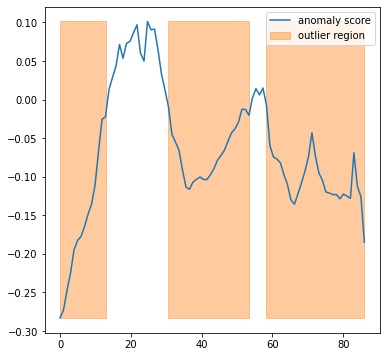

In [ ]:
# Gráfico de valores atípicos
plt.figure(figsize=(6,6))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='#FF7F0E', 
                 alpha=.4, label='outlier region')
plt.legend()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Cuando se trabaja con problemas de agrupación en clústeres, escalar los datos es crucial
camas_covid_scaled = StandardScaler().fit_transform(camas_covid[cols].values)

# ajustar
db = DBSCAN(eps=3.0, min_samples=10).fit(camas_covid[cols])
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [ ]:
# Cuente el número de valores atípicos de las etiquetas de muestra (= -1) 
pd.Series(labels).value_counts() 

-1    88
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


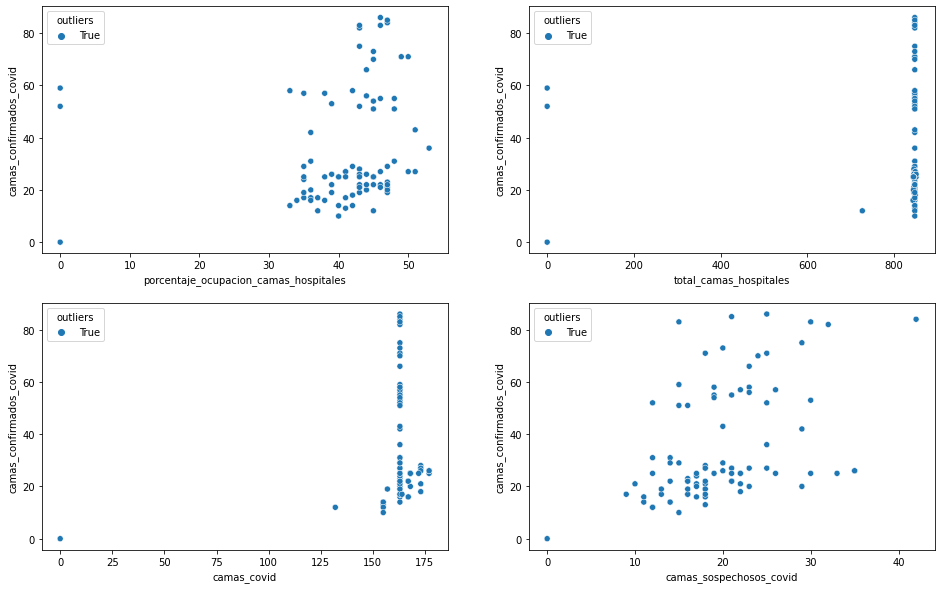

In [ ]:
plt.figure(figsize=(16,10))
camas_covid_outlier = camas_covid[cols]
camas_covid_outlier['outliers'] = [True if l == -1 else False for l in labels]

ax1=plt.subplot(2, 2, 1)
sns.scatterplot(x='porcentaje_ocupacion_camas_hospitales', y='camas_confirmados_covid', hue='outliers', data=camas_covid_outlier,ax=ax1)
ax2=plt.subplot(2, 2, 2)
sns.scatterplot(x='total_camas_hospitales', y='camas_confirmados_covid', hue='outliers', data=camas_covid_outlier,ax=ax2)
ax3=plt.subplot(2, 2, 3)
sns.scatterplot(x='camas_covid', y='camas_confirmados_covid', hue='outliers', data=camas_covid_outlier,ax=ax3)
ax4=plt.subplot(2, 2, 4)
sns.scatterplot(x='camas_sospechosos_covid', y='camas_confirmados_covid', hue='outliers', data=camas_covid_outlier,ax=ax4)


Dsepues de analizar ambos dataset se puede concluir que ambos presentan variables con datos de comportamiento extraño, algo que se debe tener en cuenta cuando se esté connstruyendo el modelo de machine learning ya que puede afectar las predicciones del mismo.